In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Data Collection (Assuming you have a dataset 'spam_data.csv')
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

# Step 2: Data Preprocessing (Assuming no preprocessing needed for simplicity)

# Step 3: Feature Extraction (Using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Choose the number of features
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1']

# Step 4: Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.78      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 33 117]]


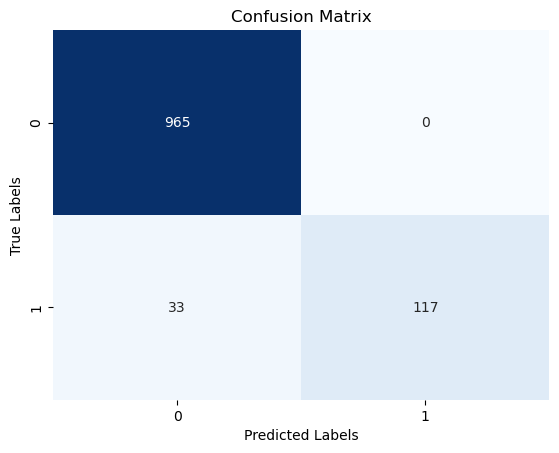

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


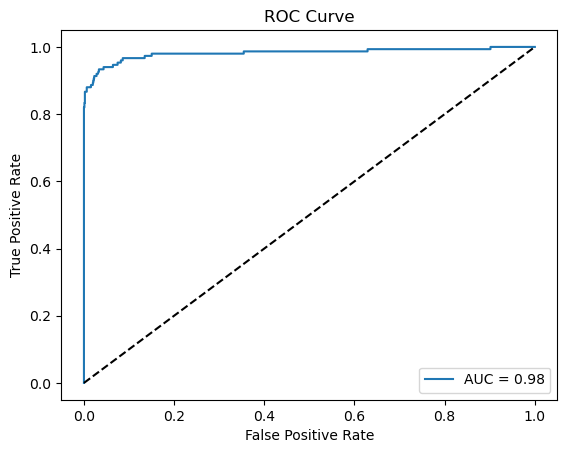

In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to binary values (0 for 'ham' and 1 for 'spam')
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
auc = roc_auc_score(y_test_binary, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
